In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

In [2]:
X_train = np.array([[2104, 5, 1, 45], 
                    [1416, 3, 2, 40], 
                    [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

print(f"X shape : {X_train.shape}, X Type : {type(X_train)}")
print(X_train)
print(f"Y shape : {y_train.shape}, Y Type : {type(y_train)}")
print(y_train)


b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"W shape : {w_init.shape}, W Type : {type(w_init)}")

X shape : (3, 4), X Type : <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
Y shape : (3,), Y Type : <class 'numpy.ndarray'>
[460 232 178]
W shape : (4,), W Type : <class 'numpy.ndarray'>


In [3]:
def predict(w, x, b):
  return w @ x +b
  # return np.dot(x, w) + b

def predict_scratch(x, w, b):
  m, n = x.shape
  p = []

  for i in range(m):
    p_i = 0

    for j in range(n):
      p_i = p_i + w[j] * x[i][j]

    p_i += b
    p.append(p_i)

  return np.array(p)


def compute_cost(x, y, w, b):
  m = len(y)
  y_pred= (x @ w) + b
  cost = (1/(2*m)) * np.sum((y_pred - y)**2)
  return cost
  '''atau bisa pakai dibawah ini dengan looping manual'''
  # cost = 0
  # for i in range(m):
  #   y_pred = (x[i] @ w) + b
  #   err = y_pred - y[i]
  #   cost += err**2
  # cost = cost / (2*m)
  # return cost

def compute_gradient(x,y,w,b):
  m, n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0.0

  for i in range(m):
    y_pred = (x[i] @ w) + b
    err = y_pred - y[i]

    for j in range(n):
      '''
      ini ibaratnya kita hitung w1 sampai w4 dnegan meniban dj_dw yang isinya [0,0,0,0]
      kemudian ke baris selanjutnya. lalu dj_dw yang isinya hasil baris ke -1  ditiban(ditambah) 
      lagi dengan dj_dw baris ke-2 dst

      '''
      dj_dw[j] += err * x[i][j]

    dj_db += err
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw, dj_db
  

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = w_in 
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(X, y, w, b)   # corrected order

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing
        



In [4]:
y = predict(X_train,w_init,b_init)
print(y)

y2 = predict_scratch(X_train,w_init,b_init)
print(y2)

np.dot(X_train[0], w_init) + b_init #ini kalau mau satu baris saja

print(compute_gradient(X_train,y_train,w_init,b_init))
print(compute_cost(X_train,y_train,w_init,b_init))

[459.99999762 231.99999837 177.99999899]
[459.99999762 231.99999837 177.99999899]
(array([-2.72623577e-03, -6.27197263e-06, -2.21745578e-06, -6.92403391e-05]), np.float64(-1.6739251501955248e-06))
1.5578904045996674e-12


In [5]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


In [6]:
def gradient_descent_autostop(x, y, w_init, b_init, alpha, cost_func, gradient_func):
    m = x.shape[0]
    dj_dw = []
    dj_db = []
    w_hist = []
    b_hist = []
    j_hist = []

    w = w_init
    b = b_init

    gradient_threshold = 1e-6
    cost_threshold = 1e-8
    
    convergen = False
    counter = 0
    while not convergen:
        dj_dw, dj_db = gradient_func(x,y,w,b)
    
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        w_hist.append(w)
        b_hist.append(b)

        cost = cost_func(x,y,w,b)
        j_hist.append(cost)

        counter += 1
        if counter > 1:
            grad_converged = np.all(abs(dj_dw) < gradient_threshold) and np.all(abs(dj_db) < gradient_threshold)
            cost_diff = j_hist[-1] - j_hist[-2]
            if cost_diff > 1e-3:                
                '''
                Tujuan kita lihat cost nya untuk meminimalisir, Dalam keadaan normal secara logika jhist[-1] HARUS < jhist[-2]
                karena cost turun setiap loop. Dan fungsi compute_cost tidak munkin negatif.
                Maka nilai dari cost_diff diharapkan selalu negatif.
                Tetapi ada dimana cost bisa naik sedikit, Maka kita buat if ini jika cost diff nya positif. Itu bertanda costnya naik
                dari nilai cost sebelumnya, karena histj[-1] (cost terakhir) > histj[-2] (cost sebelum terakhir)
                '''
                print(f"⚠️ WARNING: Cost increased from {j_hist[-2]:.6f} to {j_hist[-1]:.6f}")
                print("   Consider reducing learning rate (alpha)")
            cost_change = abs(cost_diff)    #jadi nilai mutalknya (selalu positif agar bisa dibandingkan dengan threshold)
            cost_converged = cost_change < cost_threshold

            if grad_converged or cost_converged:
                convergen = True
                print(f"\n✓ Converged at iteration {counter}")
                if grad_converged:
                    print(f"  Reason: Gradient < {gradient_threshold}")
                if cost_converged:
                    print(f"  Reason: Cost change < {cost_threshold}")
            
            if counter > 100000:
                print("Max Iteration reached")
                break

        if counter % 100 == 0 or convergen:
            print(f"Iteration {counter:4}: Cost {j_hist[-1]:0.2e} "
                    f"dj_dw: {dj_dw:}, dj_db: {dj_db:0.3e} "
                    f"w: {w:}, b: {b:0.3e}")
        
    return w,b,j_hist,b_hist,w_hist

In [7]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist, b_hist, w_hist= gradient_descent_autostop(X_train, y_train, initial_w, initial_b,
                                            alpha,compute_cost, compute_gradient)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration  100: Cost 6.96e+02 dj_dw: [ -3.66353181  -6.58623489  22.95533416 144.50900371], dj_db: 4.808e+00 w: [ 0.20234987  0.00079467 -0.0009851  -0.00212511], b: -1.175e-04
Iteration  200: Cost 6.95e+02 dj_dw: [ -3.64718356  -6.5816076   22.92226892 143.86420737], dj_db: 4.785e+00 w: [ 0.20253264  0.00112386 -0.00213203 -0.00933426], b: -3.573e-04
Iteration  300: Cost 6.94e+02 dj_dw: [ -3.63090784  -6.57700054  22.88934957 143.22227193], dj_db: 4.762e+00 w: [ 0.20271459  0.00145282 -0.00327731 -0.01651125], b: -5.959e-04
Iteration  400: Cost 6.93e+02 dj_dw: [ -3.61470434  -6.57241364  22.85657547 142.58318471], dj_db: 4.740e+00 w: [ 0.20289572  0.00178156 -0.00442095 -0.02365622], b: -8.335e-04
Iteration  500: Cost 6.92e+02 dj_dw: [ -3.59857273  -6.56784679  22.82394596 141.94693308], dj_db: 4.717e+00 w: [ 0.20307605  0.00211006 -0.00556296 -0.0307693 ], b: -1.070e-03
Iteration  600: Cost 6.91e+02 dj_dw: [ -3.58251269  -6.56329992  22.79146042 141.31350443], dj_db: 4.695e+00 w: [ 0

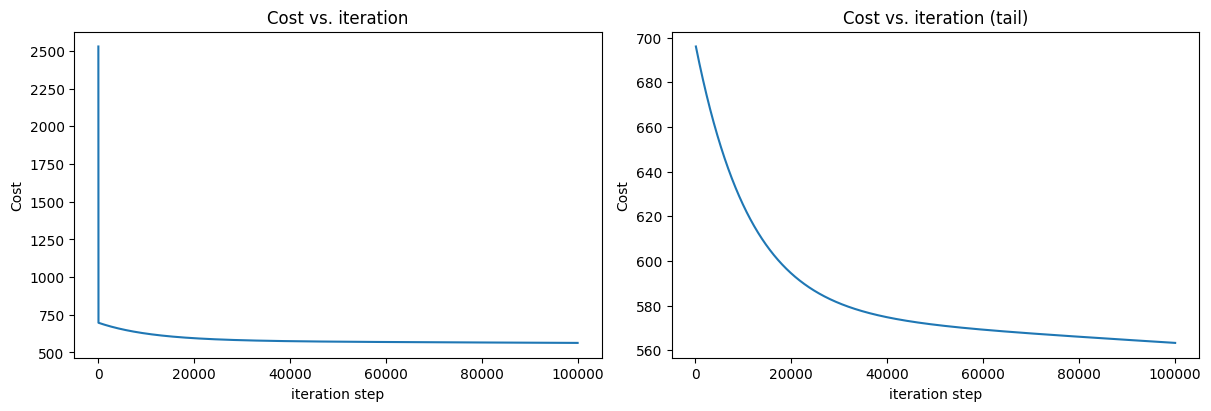

In [8]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

## 📊 Analisis Hasil Prediksi

Dari hasil training di atas, kita dapat melihat bahwa:

| Metrik | Nilai |
|--------|-------|
| **Prediksi rumah 1** | 426.19 (target: 460) → error: **-33.81** |
| **Prediksi rumah 2** | 286.17 (target: 232) → error: **+54.17** |
| **Prediksi rumah 3** | 171.47 (target: 178) → error: **-6.53** |

### ⚠️ Masalah yang Teridentifikasi:

1. **Error cukup besar** (hingga 54.17 atau ~23% dari target)
2. **Convergence lambat** (butuh 1000 iterasi)
3. **Cost masih tinggi** (~687-695)

---

## 🔍 Penyebab: Skala Feature Tidak Seimbang

Mari kita lihat range data training:

| Feature | Min | Max | Range |
|---------|-----|-----|-------|
| **Size (sqft)** | 852 | 2104 | **1252** 🔴 |
| **Bedrooms** | 2 | 5 | **3** |
| **Floors** | 1 | 2 | **1** |
| **Age** | 35 | 45 | **10** |

**Masalah:** Feature `Size` memiliki range **ratusan kali lebih besar** dari feature lainnya!

### 📐 Dampak pada Gradient Descent:
Akibatnya:
- ❌ Gradient descent **tidak efisien** (zig-zag)
- ❌ Learning rate harus **sangat kecil** (5.0e-7)
- ❌ Convergence **sangat lambat**
---
## ✅ Solusi: Feature Scaling
Kita akan menggunakan **Z-score normalization** untuk menyamakan skala semua feature:
$$
x_{norm} = \frac{x - \mu}{\sigma}
$$
Dimana:
- $\mu$ = mean (rata-rata)
- $\sigma$ = standard deviation (standar deviasi)
### 🎯 Keuntungan:
1. ✅ Semua feature dalam **skala yang sama** (~-1 sampai +1)
2. ✅ Gradient descent **lebih cepat** dan **lebih stabil**
3. ✅ Bisa pakai **learning rate lebih besar**
4. ✅ **Convergence lebih cepat** (iterasi lebih sedikit)
5. ✅ **Prediksi lebih akurat**


In [18]:
#kita buat std dan rata2 dlu
x_mean = X_train.mean() #ini menghirung rata2 seluruhnya, tapi kita perlu rata2 perkolom
x_meanfix = X_train.mean(axis=0)
x_std = X_train.std()
x_stdfix = X_train.std(axis=0)
x_norm = (X_train - x_meanfix) / x_stdfix

alpha = 1e-2

w_final, b_final, J_hist, b_hist, w_hist= gradient_descent_autostop(x_norm, y_train, initial_w, initial_b,
                                            alpha,compute_cost, compute_gradient)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")


Iteration  100: Cost 5.70e+03 dj_dw: [-5.24314456 -6.53406398 10.36646614 -4.65893772], dj_db: -1.072e+02 w: [ 36.77519121  39.00014239 -21.29496232  35.61758362], b: 1.839e+02
Iteration  200: Cost 7.61e+02 dj_dw: [-0.04841849 -0.51673974  3.53167695  0.15344955], dj_db: -3.925e+01 w: [ 38.18973862  41.22186018 -27.5464469   36.6769715 ], b: 2.511e+02
Iteration  300: Cost 1.02e+02 dj_dw: [ 0.07138881 -0.09850932  1.27023283  0.14413944], dj_db: -1.437e+01 w: [ 38.13057306  41.45552084 -29.74363777  36.49207029], b: 2.758e+02
Iteration  400: Cost 1.37e+01 dj_dw: [ 0.0301672  -0.03146864  0.46028901  0.05653657], dj_db: -5.258e+00 w: [ 38.08164394  41.51282354 -30.53734307  36.39767585], b: 2.848e+02
Iteration  500: Cost 1.83e+00 dj_dw: [ 0.01114893 -0.01121139  0.16695887  0.02071413], dj_db: -1.925e+00 w: [ 38.0625754   41.53229391 -30.82512153  36.36212051], b: 2.881e+02
Iteration  600: Cost 2.45e-01 dj_dw: [ 0.00405445 -0.00405745  0.06056832  0.00752447], dj_db: -7.045e-01 w: [ 38.0

In [19]:
## 🧪 Test Data untuk Uji Overfitting

# Data test (rumah baru yang belum pernah dilihat model)
X_test = np.array([
    [1500, 4, 1, 42],   # Rumah 4: Size 1500 sqft, 4 bedrooms, 1 floor, 42 tahun
    [1200, 3, 1, 38],   # Rumah 5: Size 1200 sqft, 3 bedrooms, 1 floor, 38 tahun
    [1800, 4, 2, 43],   # Rumah 6: Size 1800 sqft, 4 bedrooms, 2 floors, 43 tahun
    [950, 2, 1, 36],    # Rumah 7: Size 950 sqft, 2 bedrooms, 1 floor, 36 tahun
    [2500, 5, 2, 48]    # Rumah 8: Size 2500 sqft, 5 bedrooms, 2 floors, 48 tahun
])

# Target harga yang realistis (berdasarkan pola data training)
# Estimasi kasar: ~$0.2 per sqft + bonus bedrooms/floors - penalty age
y_test = np.array([
    320,  # Rumah 4: Medium size, 4 bedrooms
    250,  # Rumah 5: Smaller, 3 bedrooms
    380,  # Rumah 6: Larger, 4 bedrooms, 2 floors
    195,  # Rumah 7: Small, 2 bedrooms
    500   # Rumah 8: Large, 5 bedrooms, 2 floors
])

print("📊 Data Test:")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\nDetail:")
for i in range(len(X_test)):
    print(f"Rumah {i+4}: Size={X_test[i,0]} sqft, Bedrooms={X_test[i,1]}, "
          f"Floors={X_test[i,2]}, Age={X_test[i,3]} → Price=${y_test[i]}k")

📊 Data Test:
X_test shape: (5, 4)
y_test shape: (5,)

Detail:
Rumah 4: Size=1500 sqft, Bedrooms=4, Floors=1, Age=42 → Price=$320k
Rumah 5: Size=1200 sqft, Bedrooms=3, Floors=1, Age=38 → Price=$250k
Rumah 6: Size=1800 sqft, Bedrooms=4, Floors=2, Age=43 → Price=$380k
Rumah 7: Size=950 sqft, Bedrooms=2, Floors=1, Age=36 → Price=$195k
Rumah 8: Size=2500 sqft, Bedrooms=5, Floors=2, Age=48 → Price=$500k


In [20]:
## 🔬 Normalisasi Data Test (Pakai Mean/Std dari Training!)

# PENTING: Pakai mean dan std dari TRAINING data, bukan dari test data!
x_test_norm = (X_test - x_mean) / x_std

print("\n✅ Data test sudah dinormalisasi dengan parameter training data")
print(f"x_mean (dari training): {x_mean}")
print(f"x_std (dari training): {x_std}")


✅ Data test sudah dinormalisasi dengan parameter training data
x_mean (dari training): 375.5
x_std (dari training): 675.195465525848


In [21]:
## 🎯 Prediksi pada Data Test

print("\n" + "="*60)
print("🧪 HASIL PREDIKSI PADA DATA TEST (Unseen Data)")
print("="*60)

for i in range(len(X_test)):
    # Prediksi
    y_pred = np.dot(x_test_norm[i], w_final) + b_final
    
    # Hitung error
    error = y_pred - y_test[i]
    error_pct = (error / y_test[i]) * 100
    
    print(f"\nRumah {i+4}:")
    print(f"  Features: Size={X_test[i,0]}, Bedrooms={X_test[i,1]}, "
          f"Floors={X_test[i,2]}, Age={X_test[i,3]}")
    print(f"  Prediksi: ${y_pred:.2f}k")
    print(f"  Target:   ${y_test[i]}k")
    print(f"  Error:    ${error:.2f}k ({error_pct:+.1f}%)")

# Hitung metrik keseluruhan
y_pred_all = np.dot(x_test_norm, w_final) + b_final
mae = np.mean(np.abs(y_pred_all - y_test))
rmse = np.sqrt(np.mean((y_pred_all - y_test)**2))
mape = np.mean(np.abs((y_pred_all - y_test) / y_test)) * 100

print("\n" + "="*60)
print("📈 METRIK EVALUASI")
print("="*60)
print(f"MAE (Mean Absolute Error):      ${mae:.2f}k")
print(f"RMSE (Root Mean Squared Error): ${rmse:.2f}k")
print(f"MAPE (Mean Absolute % Error):   {mape:.1f}%")

if mape < 10:
    print("\n✅ BAGUS! Model generalize dengan baik (error < 10%)")
elif mape < 20:
    print("\n⚠️  CUKUP! Model masih OK tapi ada sedikit overfitting (error 10-20%)")
else:
    print("\n❌ OVERFITTING! Model tidak generalize dengan baik (error > 20%)")


🧪 HASIL PREDIKSI PADA DATA TEST (Unseen Data)

Rumah 4:
  Features: Size=1500, Bedrooms=4, Floors=1, Age=42
  Prediksi: $329.75k
  Target:   $320k
  Error:    $9.75k (+3.0%)

Rumah 5:
  Features: Size=1200, Bedrooms=3, Floors=1, Age=38
  Prediksi: $312.57k
  Target:   $250k
  Error:    $62.57k (+25.0%)

Rumah 6:
  Features: Size=1800, Bedrooms=4, Floors=2, Age=43
  Prediksi: $346.67k
  Target:   $380k
  Error:    $-33.33k (-8.8%)

Rumah 7:
  Features: Size=950, Bedrooms=2, Floors=1, Age=36
  Prediksi: $298.31k
  Target:   $195k
  Error:    $103.31k (+53.0%)

Rumah 8:
  Features: Size=2500, Bedrooms=5, Floors=2, Age=48
  Prediksi: $386.45k
  Target:   $500k
  Error:    $-113.55k (-22.7%)

📈 METRIK EVALUASI
MAE (Mean Absolute Error):      $64.50k
RMSE (Root Mean Squared Error): $75.75k
MAPE (Mean Absolute % Error):   22.5%

❌ OVERFITTING! Model tidak generalize dengan baik (error > 20%)
